# Lecture 13 – Data 100, Summer 2024

[Acknowledgments Page](https://ds100.org/su24/acks/)

In [46]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Using `scikit-learn` to fit our Multiple Linear Regression Model

Consider the `penguins` dataset.

In [47]:
df = sns.load_dataset("penguins")
df = df[df["species"] == "Adelie"].dropna()
df

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
147  Adelie      Dream            36.6           18.4              184.0   
148  Adelie      Dream            36.0           17.8              195.0   
149  Adelie      Dream            37.8           18.1              193.0   
150  Adelie      Dream            36.0           17.1              187.0   
151  Adelie      Dream            41.5           18.5              201.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
147       3475.0  Female  
148       3450.0  Female  
149       3750.0    Male  
150       3700.0  Female  
151       4000.0    Male  

[146 rows x 7 columns]

Suppose we could measure flippers and weight easily, but not bill dimensions.
How can we predict **bill depth** from flipper length and/or body mass?

For demo purposes, we'll drop all columns except the variables whose relationships we're interested in modeling.

In [48]:
df = sns.load_dataset("penguins")
df = df[df["species"] == "Adelie"].dropna()
df = df[["bill_depth_mm", "flipper_length_mm", "body_mass_g"]]
df

bill_depth_mm  flipper_length_mm  body_mass_g
0             18.7              181.0       3750.0
1             17.4              186.0       3800.0
2             18.0              195.0       3250.0
4             19.3              193.0       3450.0
5             20.6              190.0       3650.0
..             ...                ...          ...
147           18.4              184.0       3475.0
148           17.8              195.0       3450.0
149           18.1              193.0       3750.0
150           17.1              187.0       3700.0
151           18.5              201.0       4000.0

[146 rows x 3 columns]

Suppose we want to create a linear regression model that predicts a penguin's **bill depth** $y$ using both their **flipper length** $x_1$ and **body mass** $x_2$, plus an intercept term.

$$\Large \hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2$$

### OLS Approach 1: Use Solution to Normal Equation

We saw in last lecture that we can model the above multiple linear regression equation using matrix multiplication:

$$ \large \hat{\mathbb{Y}} = \mathbb{X} \theta$$

The optimal $\hat{\theta}$ that minimizes MSE also solves the **normal equation**:

$$ \left( \mathbb{X}^T \mathbb{X} \right) \hat{\theta} = \mathbb{X}^T \mathbb{Y}$$

If $\mathbb{X}$ is full column rank, then there is a unique solution to $\hat{\theta}$

$$\large \hat{\theta} = \left( \mathbb{X}^T \mathbb{X} \right)^{-1} \mathbb{X}^T \mathbb{Y}$$

Note that this derivation is one of the most challenging in the course, especially for those of you who are learning linear algebra during the same semester.

<br/>

---

Let's try this in code. We will add a bias term both so we actually represent the linear equation we proposed (with intercept), as well as so that our residuals sum to zero.

In [49]:
X = df[["flipper_length_mm", "body_mass_g"]]
X["bias"] = 1
X

flipper_length_mm  body_mass_g  bias
0                181.0       3750.0     1
1                186.0       3800.0     1
2                195.0       3250.0     1
4                193.0       3450.0     1
5                190.0       3650.0     1
..                 ...          ...   ...
147              184.0       3475.0     1
148              195.0       3450.0     1
149              193.0       3750.0     1
150              187.0       3700.0     1
151              201.0       4000.0     1

[146 rows x 3 columns]

In [50]:
y = df["bill_depth_mm"]
y

0      18.7
1      17.4
2      18.0
4      19.3
5      20.6
       ... 
147    18.4
148    17.8
149    18.1
150    17.1
151    18.5
Name: bill_depth_mm, Length: 146, dtype: float64

Recall the solution to the normal equation if $\mathbb{X}$ is full column rank:

$$\hat{\theta} = \left( \mathbb{X}^T \mathbb{X} \right)^{-1} \mathbb{X}^T \mathbb{Y}$$

In [51]:
np.linalg.inv(X.T @ X) @ X.T @ y

0     0.009828
1     0.001477
2    11.002995
dtype: float64

In [52]:
theta_using_normal_equation =  np.linalg.inv(X.T @ X) @ X.T @ y

Note: The code above is inefficient. We won't go into this in our class, but it's better to use `np.linalg.solve` rather than computing the explicit matrix inverse.

This also doesn't work if our X is **not invertible**. You will explore this in lab.

#### Make Predictions
We'll save the predictions in a column so we can compare them against using sklearn.

In [53]:
df["pred_bill_depth_mm"] = X.to_numpy() @ theta_using_normal_equation
df

bill_depth_mm  flipper_length_mm  body_mass_g  pred_bill_depth_mm
0             18.7              181.0       3750.0           18.322561
1             17.4              186.0       3800.0           18.445578
2             18.0              195.0       3250.0           17.721412
4             19.3              193.0       3450.0           17.997254
5             20.6              190.0       3650.0           18.263268
..             ...                ...          ...                 ...
147           18.4              184.0       3475.0           17.945735
148           17.8              195.0       3450.0           18.016911
149           18.1              193.0       3750.0           18.440503
150           17.1              187.0       3700.0           18.307657
151           18.5              201.0       4000.0           18.888505

[146 rows x 4 columns]

<br/><br/>

### Using `sklearn` to fit our Multiple Linear Regression Model


An alternate approach to optimize our model is to use the `sklearn.linear_model.LinearRegression` class. [(Documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) 

In [54]:
from sklearn.linear_model import LinearRegression

1. **Create an `sklearn` object.**

    First we create a model. At this point the model has not been fit so it has no parameters.

In [55]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

2. **`fit` the object to data.**

    Then we "fit" the model, which means computing the parameters that minimize the loss function. The `LinearRegression` class is hard coded to use the **MSE** as its loss function. The first argument of the fit function should be a matrix (or DataFrame), and the second should be the observations we're trying to predict. 

In [56]:
model.fit(
    X=df[["flipper_length_mm", "body_mass_g"]], 
    y=df["bill_depth_mm"])

LinearRegression()

3. **Analyze fit or call `predict`.**

    Now that our model is trained, we can ask it questions. The code below asks the model to estimate the bill depth (in mm) for a penguin with a 185 mm flipper length.

In [57]:
model.predict([[185, 3750.0]]) # why the double brackets?

/srv/conda/envs/notebook/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([18.36187501])

We can also ask the model to generate a series of predictions:

In [60]:
df["sklearn_preds"] = model.predict(df[["flipper_length_mm", "body_mass_g"]])
df

bill_depth_mm  flipper_length_mm  body_mass_g  pred_bill_depth_mm  \
0             18.7              181.0       3750.0           18.322561   
1             17.4              186.0       3800.0           18.445578   
2             18.0              195.0       3250.0           17.721412   
4             19.3              193.0       3450.0           17.997254   
5             20.6              190.0       3650.0           18.263268   
..             ...                ...          ...                 ...   
147           18.4              184.0       3475.0           17.945735   
148           17.8              195.0       3450.0           18.016911   
149           18.1              193.0       3750.0           18.440503   
150           17.1              187.0       3700.0           18.307657   
151           18.5              201.0       4000.0           18.888505   

     sklearn_preds  
0        18.322561  
1        18.445578  
2        17.721412  
4        17.997254  
5        18.263268  
..             ...  
147      17.945735  
148      18.016911  
149      18.440503  
150      18.307657  
151      18.888505  

[146 rows x 5 columns]

Looking at the predictions, we see that they are exactly the same as we got using our analytic formula!!

**Analyze parameters.**

We can ask the model for its intercept and slope with `intercept_` and `coef_`, respectively.

In [ ]:
model.intercept_      # why is this a scalar?

In [ ]:
model.coef_           # why is this an array?

 They are the same as with our analytic formula.

In [ ]:
# vs. analytical solutions
theta_using_normal_equation

They look the same, but why are they out of order...?

Remember our order of columns used for normal equation!

### Visualize the Fit
We can visualize this data in three dimensions but for many (most) real-world problems this will not be possible (or helpful).

Note, the following code is out of scope for this class.

In [ ]:
fig = px.scatter_3d(df, x="flipper_length_mm", y="body_mass_g", z="bill_depth_mm")

# Create a grid of points to evaluate plane
grid_resolution = 2
(u,v) = np.meshgrid(
    np.linspace(df["flipper_length_mm"].min(), df["flipper_length_mm"].max(), grid_resolution),
    np.linspace(df["body_mass_g"].min(), df["body_mass_g"].max(), grid_resolution))
features = pd.DataFrame({"flipper_length_mm": u.flatten(),
                         "body_mass_g": v.flatten()})
# Make predictions at every point on the grid
zs = model.predict(features)

# create the Surface
fig.add_trace(go.Surface(x=u, y=v, z= zs.reshape(u.shape), opacity=0.9, showscale=False))
fig.update_layout(autosize=False, width=800, height=600)

We see that the predictions all lie in a plane. In higher dimensions, they all lie in a "hyperplane". 

**Analyze performance.**

The `sklearn` package also provides a function that computes the MSE from a list of observations and predictions. This avoids us having to manually compute MSE by first computing residuals.

[documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

In [ ]:
from sklearn.metrics import  mean_squared_error
mean_squared_error(df["bill_depth_mm"], df["sklearn_preds"])

<br><br>

**Bonus Demo** 
Later in the semester we will learn about other models. However, you already know enough to start using other techniques:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()

tree_model.fit(
    X=df[["flipper_length_mm", "body_mass_g"]], 
    y=df["bill_depth_mm"])

In [ ]:
df["sklearn_dt_preds"] = tree_model.predict(df[["flipper_length_mm", "body_mass_g"]])

In [ ]:
mean_squared_error(df["bill_depth_mm"], df["sklearn_dt_preds"])

Lower error! A better model? Let's visualize it.

In [ ]:
fig = px.scatter_3d(df, x="flipper_length_mm", y="body_mass_g", z="bill_depth_mm")

# Create a grid of points to evaluate plane
grid_resolution = 20
(u,v) = np.meshgrid(
    np.linspace(df["flipper_length_mm"].min(), df["flipper_length_mm"].max(), grid_resolution),
    np.linspace(df["body_mass_g"].min(), df["body_mass_g"].max(), grid_resolution))
features = pd.DataFrame({"flipper_length_mm": u.flatten(),
                         "body_mass_g": v.flatten()})

# Make predictions at every point on the grid
zs = tree_model.predict(features) #<------------------ Only change

# create the Surface
fig.add_trace(go.Surface(x=u, y=v, z= zs.reshape(u.shape), opacity=0.9, showscale=False))
fig.update_layout(autosize=False, width=800, height=600)

Is this really better? This will be the focus of the later half of this class?

<br><br>

**Return to Lecture**

<br><br>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />


# Minimizing an Arbitrary 1D Function

Suppose we want to find the value of $x$ that minimizes the arbitrary function given below:

$$
\frac{1}{10}\left(x^4 - 15x^3 + 80 x^2 - 180x + 144\right)
$$

In [9]:
def arbitrary(x):
    return (x**4 - 15*x**3 + 80*x**2 - 180*x + 144)/10

Minimization via visualization:

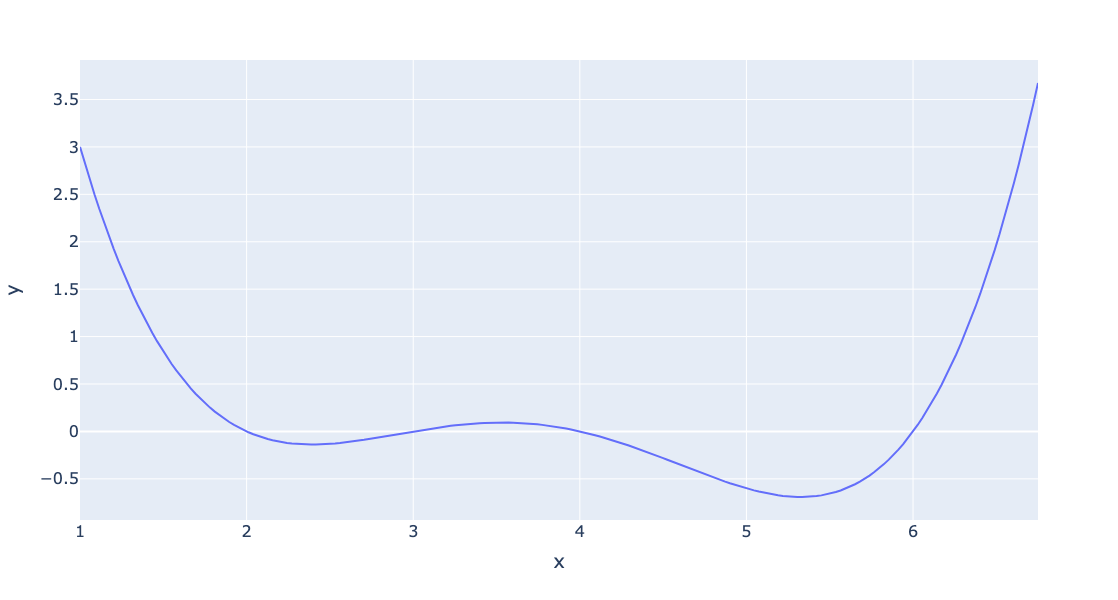

In [10]:
x = np.linspace(1, 6.75, 200)
fig = px.line(y = arbitrary(x), x = x)
fig.update_layout(font_size = 16)
fig.update_layout(autosize=False, width=800, height=600)

Above, we see that the minimum is somewhere around 5.3ish.

### The Naive Approach: Guess and Check

Another approach would be to guess and check

In [11]:
def simple_minimize(f, xs):
    y = [f(x) for x in xs]
    return xs[np.argmin(y)]

In [12]:
guesses = [5.3, 5.31, 5.32, 5.33, 5.34, 5.35]
simple_minimize(arbitrary, guesses)

5.33

This process is essentially the same as before where we made a graphical plot, it's just that we're only looking at a few selected points.

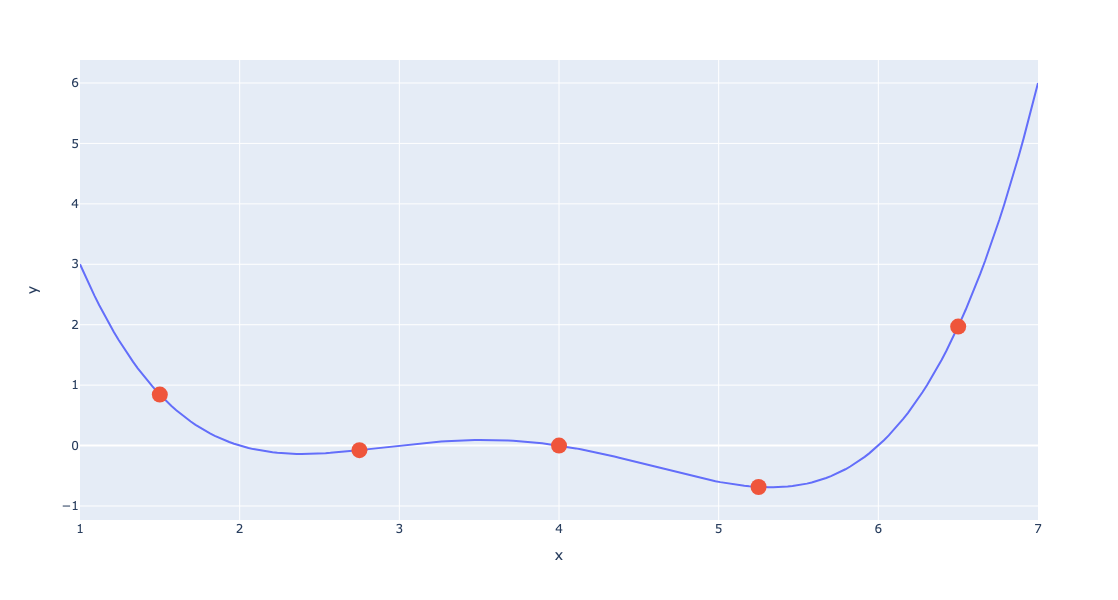

In [13]:
xs = np.linspace(1, 7, 200)
sparse_xs = np.linspace(1.5, 6.5, 5)

ys = arbitrary(xs)
sparse_ys = arbitrary(sparse_xs)

fig = px.line(x = xs, y = arbitrary(xs))
fig.add_scatter(x = sparse_xs, y = arbitrary(sparse_xs), mode = "markers", marker_size=16)
fig.update_layout(showlegend= False)
fig.update_layout(autosize=False, width=800, height=600)
fig.show()

This basic approach suffers from three major flaws:
1. If the minimum is outside our range of guesses, the answer will be completely wrong.
2. Even if our range of guesses is correct, if the guesses are too coarse, our answer will be inaccurate.
3. It is not computationally efficient, considering potentially vast numbers of bad guesses

<br/><br/><br/>


### `scipy.optimize.minimize`

One way to minimize this mathematical function is to use the `scipy.optimize.minimize` function. It takes a function and a starting guess and tries to find the minimum.

In [14]:
from scipy.optimize import minimize

minimize(arbitrary, x0 = 3.5)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -0.13827491292945523
        x: [ 2.393e+00]
      nit: 3
      jac: [ 6.484e-06]
 hess_inv: [[ 7.385e-01]]
     nfev: 20
     njev: 10

How can this one line of code find the minimum of any mathematical function so quickly? 

Behind the scenes, `scipy.optimize.minimize` uses a collection of techniques to compute the minimizing value of a function. Many of these techniques operate on numerical approximations to the gradient.

In this lecture, we will learn the basics of gradient descent, then implement it ourselves.

<br><br><br>

**Return to Lecture**


<br><br>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />



# Gradient Descent


Instead of choosing all of our guesses ahead of time, we can instead start from a single guess and try to iteratively improve on our choice. 

They key insight is this: If the derivative of the function is negative, that means the function is decreasing, so we should go to the right (i.e. pick a bigger x). If the derivative of the function is positive, that means the function is increasing, so we should go to the left (i.e. pick a smaller x).

Thus, the derivative tells us which way to go.

Desmos demo: [https://www.desmos.com/calculator/twpnylu4lr](https://www.desmos.com/calculator/twpnylu4lr)

Taking the derivative of my arbitrary function:

\begin{align}
f(x) & = \frac{1}{10}\left(x^4 - 15x^3 + 80 x^2 - 180x + 144\right)\\
\frac{\partial}{\partial x} f(x) & = \frac{1}{10}\left(4x^3 - 45x^2 + 160 x - 180\right)\\
\end{align}

In [15]:
def derivative_arbitrary(x):
    return (4*x**3 - 45*x**2 + 160*x - 180)/10

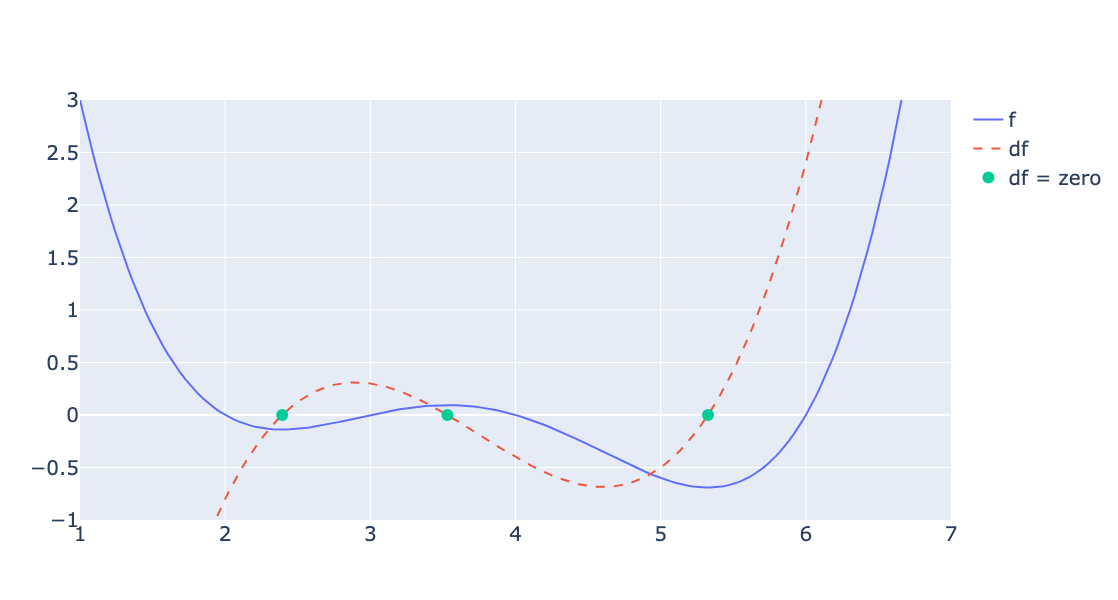

In [16]:
f_line = go.Scatter(x = xs, y = arbitrary(xs), mode = "lines", name = "f")
derivative_line = go.Scatter(x = xs, y = derivative_arbitrary(xs), 
                             mode = "lines", name = "df", line = {"dash": "dash"})
roots = np.array([2.3927, 3.5309, 5.3263]) # computed using algorithm
root_markers = go.Scatter(x = np.array(roots), y = 0*roots, 
                         mode = "markers", name = "df = zero", marker_size = 12)

fig = go.Figure()
fig.add_traces([f_line, derivative_line, root_markers])
fig.update_layout(font_size = 20, yaxis_range=[-1, 3])
fig.update_layout(autosize=False, width=800, height=600)
fig.show()

## Manually Descending the Gradient

Armed with this knowledge, let's try to see if we can use the derivative to optimize the function.

We start by making some guess for the minimizing value of $x$. Then, we look at the derivative of the function at this value of $x$, and step downhill in the *opposite* direction. We can express our new rule as a recurrence relation:

$$x^{(t+1)} = x^{(t)} - \frac{d}{dx} f(x^{(t)})$$

We obtain **our next guess** for the minimizing value of $x$ at timestep $t+1$ ($x^{(t+1)}$) by taking the guess **our last guess** ($x^{(t)}$) and subtracting the **derivative of the function** at that point ($\frac{d}{dx} f(x^{(t)})$).

`arbitrary` represents the function we are trying to minimize, $f$. 

`derivative_arbitrary` represents the first derivative of this function, $\frac{df}{dx}$.


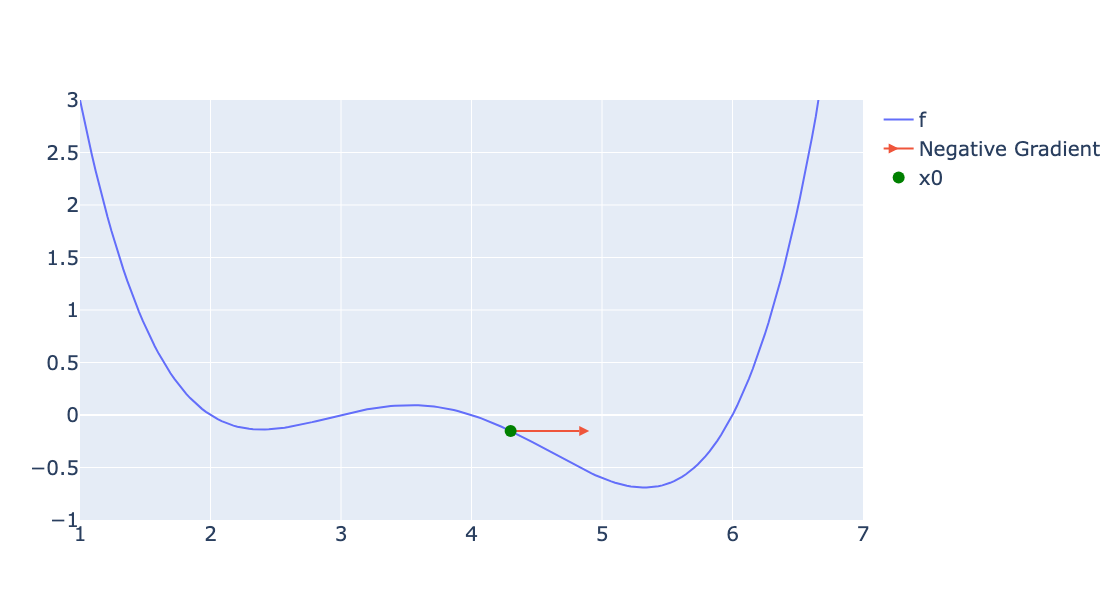

In [17]:
x = 4.3
fig = go.Figure()
fig.add_trace(f_line)
fig.add_trace(go.Scatter(
    x=[x, x - derivative_arbitrary(x)], y=[arbitrary(x),arbitrary(x)],  
    marker= dict(size=10,symbol= "arrow-bar-up", angleref="previous"),
    name="Negative Gradient"
    ))
fig.add_trace(go.Scatter(x=[x],y=[arbitrary(x)], 
                         marker_color="green", marker_size=12,
                         mode="markers", name="x0"))
fig.update_layout(font_size = 20, yaxis_range=[-1, 3])
fig.update_layout(autosize=False, width=800, height=600)
fig


Running the algorithm one step at a time

In [18]:
def take_one_step(x):
    # Find our new guess using the recurrence relation
    new_x = x - derivative_arbitrary(x)
    return new_x

#### Starting with an initial guess of 4.0 and taking 10 steps:

In [19]:
x = 4.0
steps = [x]
for i in range(10):
    x = take_one_step(x)
    steps.append(x) 

print(steps)


[4.0, 4.4, 5.0464000000000055, 5.496730601062393, 5.0808624852305115, 5.489980392167775, 5.092824872119241, 5.486755386070718, 5.0984728528436225, 5.485072693208349, 5.101402551267881]


#### Visualizing the optimization steps

The following visualization code is out-of-scope for Data-100

In [20]:
# This code is out-of-scope for data-100 but could be fun to learn.
def plot_steps(steps, f = arbitrary, f_line = f_line):
    fig = go.Figure()
    fig.add_trace(f_line)
    fig.add_trace(go.Scatter(x = steps, y = [f(s) for s in steps], 
                             mode = "lines+markers", line = {"dash": "dash", "color": "red"},
                             name = "Path", 
                             marker_symbol="arrow",
                             marker_angleref="previous",
                             marker_standoff=4,
                             marker_size = 16))
    fig.add_trace(go.Scatter(x = steps, y = [f(s) for s in steps], 
                             mode = "markers", 
                             name = "Path",
                             marker_color="red",
                             showlegend=False,
                             marker_size = 8))
    fig.update_layout(font_size = 20)
    fig.update_layout(autosize=False, width=800, height=600)

    return fig

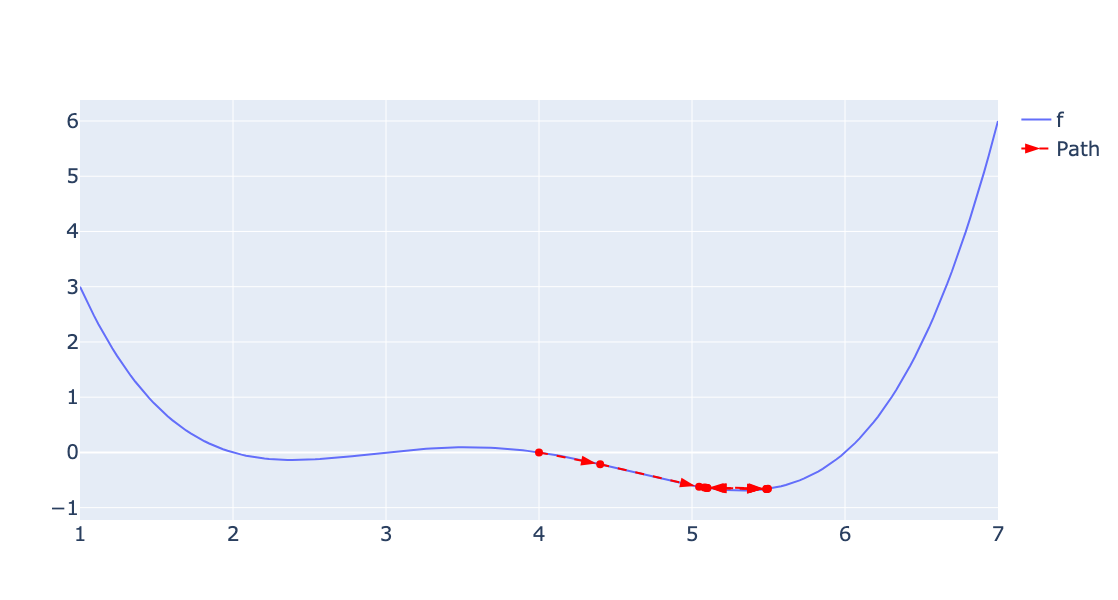

In [21]:
plot_steps(steps)

Looking pretty good! We do have a problem though – once we arrive close to the minimum value of the function, our guesses "bounce" back and forth past the minimum without ever reaching it.

In other words, each step we take when updating our guess moves us too far. We can address this by decreasing the size of each step. 

Let's update our algorithm to use a **learning rate** (also sometimes called the step size), which controls how far we move with each update. We represent the learning rate with $\alpha$. 

$$x^{(t+1)} = x^{(t)} - \alpha \frac{d}{dx} f(x^{(t)})$$

A small $\alpha$ means that we will take small update steps; a large $\alpha$ means we will take large steps. 

Let's update our function to use $\alpha=0.3$.

In [22]:
def take_one_step_lr(x, alpha):
    # Find our new guess using the recurrence relation
    new_x = x - alpha * derivative_arbitrary(x)
    return new_x

4.12
4.267296639999997
4.442725838159953
4.640926244829146
4.846183704850335
5.032118544823421
5.17201478493924
5.2564844894138165
5.297911492494514
5.315427176589101
5.322260602055931
5.324832983472768
5.325787650752968
5.3261400404400865
5.326269854338316


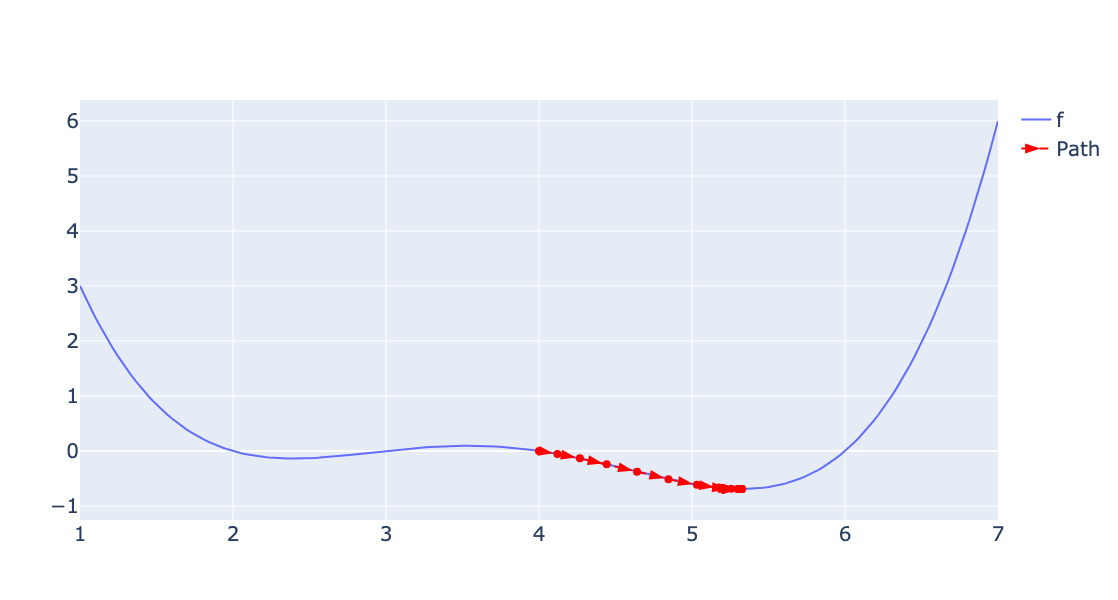

In [23]:
x = 4.0
steps = [x]
for i in range(15):
    x = take_one_step_lr(x, alpha=0.3)
    print(x)
    steps.append(x) 

plot_steps(steps)


<br/><br/>

**Return to Slides**

<br/><br/>

## The Gradient Descent Algorithm

The process we just explored above is called **gradient descent** – we compute the derivative of a function (its *gradient*) with respect to the variable we wish to optimize, then *descend* down to the minimum of the function. 

$$
x^{(t+1)} = x^{(t)} -  \alpha \frac{d}{dx} f(x)
$$

In the cell below, we define `gradient_descent`, which runs the gradient descent algorithm for a specified number `n` of updates and stores all guesses. 

In [44]:
def gradient_descent(deriv_fn, initial_guess, alpha, n):
    """Performs n steps of gradient descent on deriv_fn using learning rate alpha starting
       from initial_guess. Returns a numpy array of all guesses over time."""
    guesses = [initial_guess]
    current_guess = initial_guess
    while len(guesses) < n:
        current_guess = current_guess - alpha * deriv_fn(current_guess)
        guesses.append(current_guess)
        
    return np.array(guesses)

Below, we see a visualization of the trajectory taken by this algorithm. Try modifying the `initial_guess`, learning rate `alpha`, and number of updates `n`. 

[1.6        3.3112     3.18920918 3.01472352 2.79207742 2.56776716
 2.42826486 2.39421613 2.39274816 2.39274798 2.39274798 2.39274798
 2.39274798 2.39274798 2.39274798 2.39274798 2.39274798 2.39274798
 2.39274798 2.39274798]


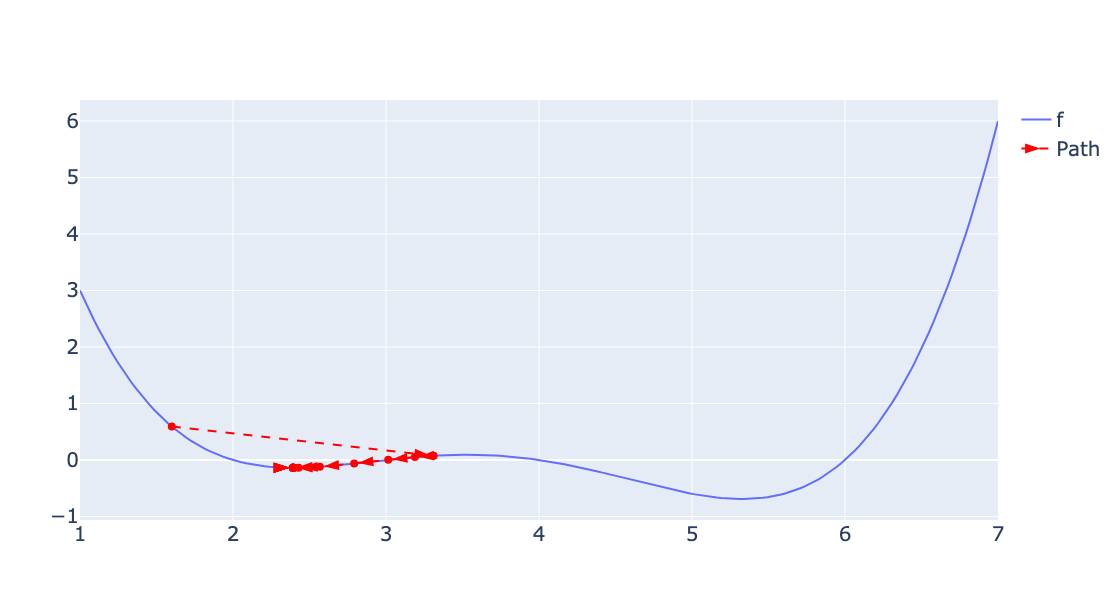

In [45]:
trajectory = gradient_descent(derivative_arbitrary, 1.6, 0.75, 20)
print(trajectory)
plot_steps(trajectory)

[6.         4.2        4.6086     5.12279483 5.38817984 5.28497822
 5.34793725 5.31315502 5.33375146 5.32197109 5.32885604 5.32488006
 5.32719254 5.32585303 5.32663079 5.32617982 5.32644152 5.32628973
 5.32637779 5.32632671]


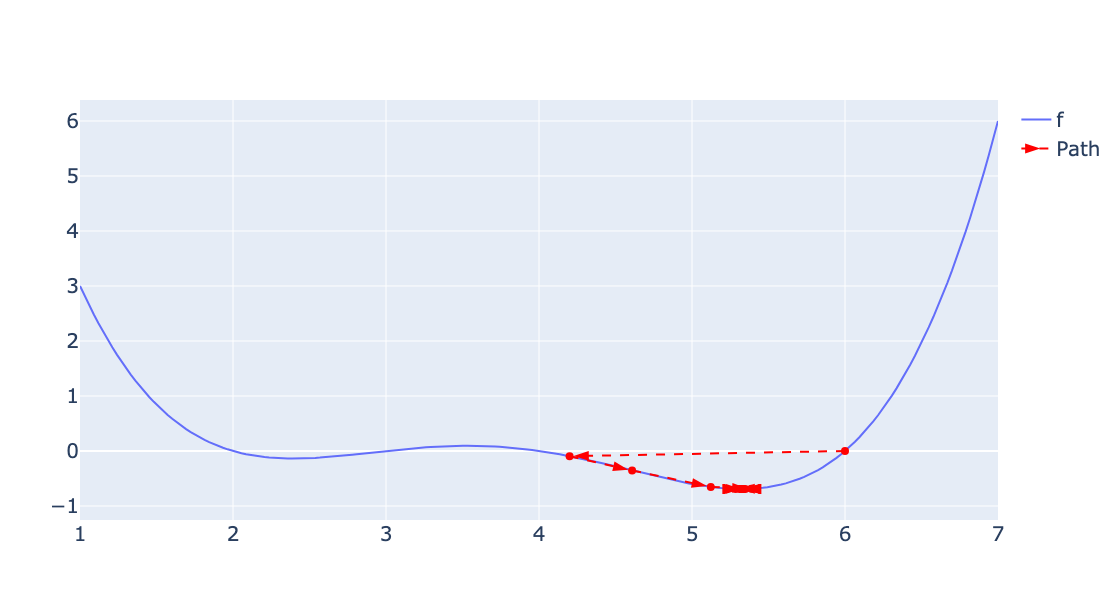

In [26]:
trajectory = gradient_descent(derivative_arbitrary, 6, 0.75, 20)
print(trajectory)
plot_steps(trajectory)

Above, we've simply run our algorithm a fixed number of times. More sophisticated implementations will stop based on a variety of different stopping criteria, e.g. error getting too small, error getting too large, etc. We will not discuss these in our course.

In the next part, we'll return to the world of real data and see how this procedure might be useful for optimizing models.

<br>

**Return to Lecture**

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Gradient Descent on a 1D Model

Recall our modeling workflow from the past few lectures: 
* Define a model with some parameters $\theta_i$
* Choose a loss function 
* Select the values of $\theta_i$ that minimize the loss function on the data

Gradient descent is a powerful technique for completing this last task. By applying the gradient descent algorithm, we can select values for our parameters $\theta_i$ that will lead to the model having minimal loss on the training data.

When using gradient descent in a modeling context:
* We make guesses for the minimizing $\theta_i$
* We compute the derivative of the loss function $L$

Using our gradient descent rule from before:

$$\theta^{(t+1)} = \theta^{(t)} - \alpha \frac{d}{d\theta} L(\theta^{(t)})$$

To see this in action, let's consider a case where we have a linear model with no offset. 

$$\hat{y} = \theta_1 x$$

Let's apply our `gradient_descent` function from before to optimize our model on the `tips` dataset. We will try to select the best parameter $\theta_i$ to predict the `tip` $y$ from the `total_bill` $x$.

$$
\hat{\texttt{tip}} = \texttt{total\_bill} * \theta_1
$$

We want to find the parameter $\theta_1$ such that the mean squared error is minimized. Our loss function is:

$$L(\theta) = MSE(\theta) = \frac{1}{n} \sum_{i=1}^n (y_i - \theta_1x_i)^2$$



In [27]:
df = sns.load_dataset("tips")
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

We can visualize the value of the MSE on our dataset for different possible choices of $\theta_1$. To optimize our model, we want to select the value of $\theta_1$ that leads to the lowest MSE.

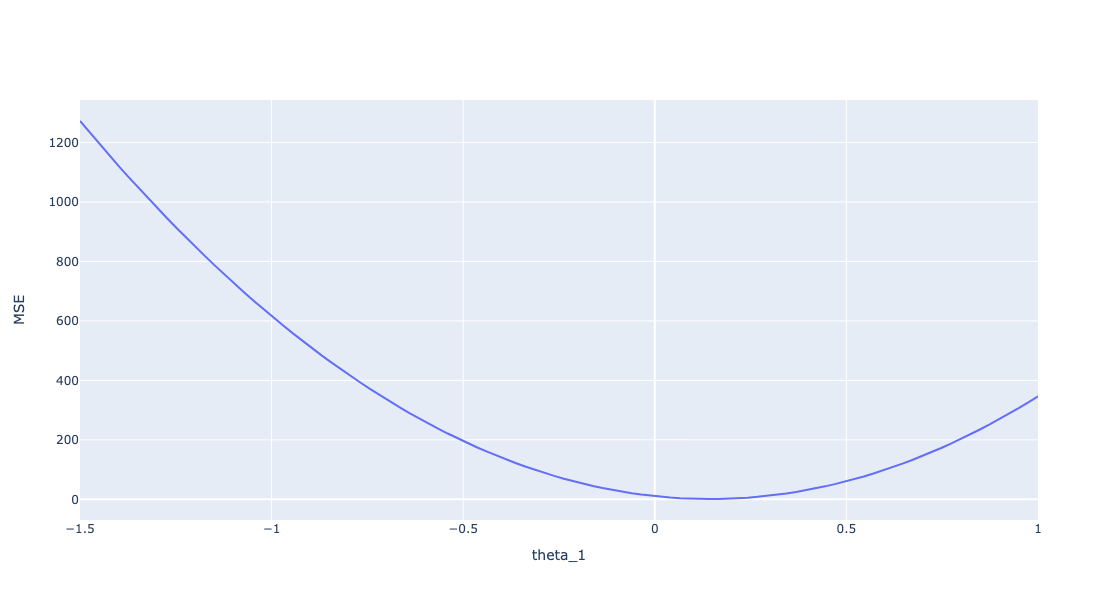

In [28]:
def mse_single_arg(theta_1):
    """Returns the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta_1 * x
    return np.mean((y_hat - y_obs) ** 2) 

thetas = np.linspace(-1.5, 1, 100)

mse_line = go.Scatter(x = thetas, y = [mse_single_arg(theta_1) for theta_1 in thetas], mode = "lines", name = "MSE")
fig = go.Figure()
fig.add_trace(mse_line)
fig.update_layout(autosize=False, width=800, height=600, xaxis_title="theta_1", yaxis_title="MSE")

To apply gradient descent, we need to compute the derivative of the loss function with respect to our parameter $\theta_1$. This comes out to be:

$$\frac{d}{d\theta_1} L(\theta^{(t)}) = \frac{-2}{n} \sum_{i=1}^n (y_i - \theta_1^{(t)}x_i)x_i$$

Here, we denote our parameter as $\theta_1^{(t)}$ to remind ourselves that we compute the derivative assuming $\theta_i$ has the value of our *current* guess. 

Our gradient descent update rule is:

$$\theta_1^{(t+1)} = \theta_1^{(t)} - \alpha \frac{-2}{n} \sum_{i=1}^n (y_i - \theta_1^{(t)}x_i)x_i$$


To use our gradient descent function, we need to compute the derivative of the MSE. The MSE is repeated below for convenience.

In [29]:
def mse_single_arg(theta_1):
    """Returns the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta_1 * x
    return np.mean((y_obs - y_hat) ** 2) 

The derivative of the MSE with respect to `theta_1` is:

In [30]:
def mse_loss_derivative_single_arg(theta_1):
    """Returns the derivative of the MSE on our data for the given theta1"""
    x = df["total_bill"]
    y_obs = df["tip"]
    y_hat = theta_1 * x
    
    return np.mean(-2 * (y_obs - y_hat) * x)

Now, we can apply gradient descent to select a value for $\theta_1$.

Final guess for theta_1: 0.14369554654231262


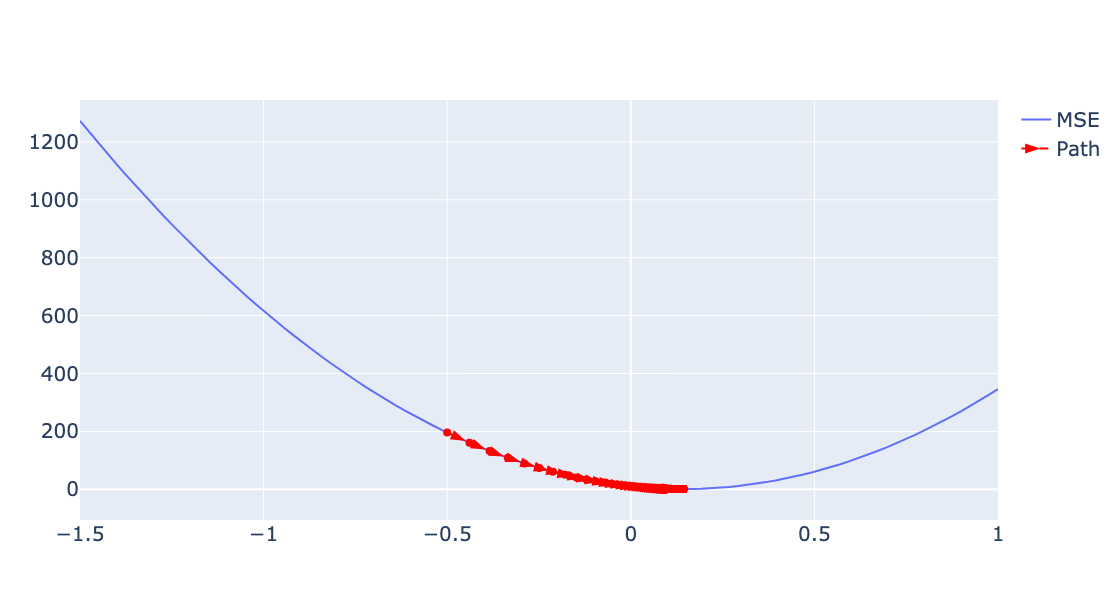

In [31]:
trajectory = gradient_descent(mse_loss_derivative_single_arg, -0.5, 0.0001, 100)
print(f"Final guess for theta_1: {trajectory[-1]}")
plot_steps(trajectory,  mse_single_arg,  mse_line)

<br/><br/>
**Return to Lecture**
<br/><br/>

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Gradient Descent on Multi-Dimensional Models

Now suppose we improve our model so that we want to predict the tip from the total_bill plus a constant offset, in other words:

$$\textrm{tip} = \theta_0 + \theta_1 \textrm{bill}$$

Our simple linear regression model has *two* parameters, $\theta_0$ and $\theta_1$. We need to optimize both of them.

Fortunately, gradient descent readily extends to models with multiple dimenions.

#### Defining a 2D MSE Function

Now, we can give our predictions as $$\hat{y} = \theta_0 + \theta_1 x_1$$

In the cell below, we add a bias term to our data to represent the constant intercept $\theta_0$.

In [32]:
tips_with_bias = df.copy()
tips_with_bias["bias"] = 1
tips_with_bias = tips_with_bias[["bias", "total_bill"]]
tips_with_bias.head()

bias  total_bill
0     1       16.99
1     1       10.34
2     1       21.01
3     1       23.68
4     1       24.59

In [33]:
X = tips_with_bias
y = df["tip"]

Throughout this problem, we'll assume we want to minimize the mean squared error of our predictions, i.e.

In [34]:
def mse_loss(theta):
    y_hat = X @ theta
    return np.mean((y - y_hat) ** 2)    

Using this function, we can visualize our loss function. Because we now want to understand how the loss changes with respect to *two* parameters, we create a **loss surface**. Each point on the surface represents the loss of the model for a particular choice of $\theta_0$ and $\theta_1$.


The cell below uses lots of syntax you've never seen. No need to worry about any unfamiliar plotting code; for now, focus on the output.

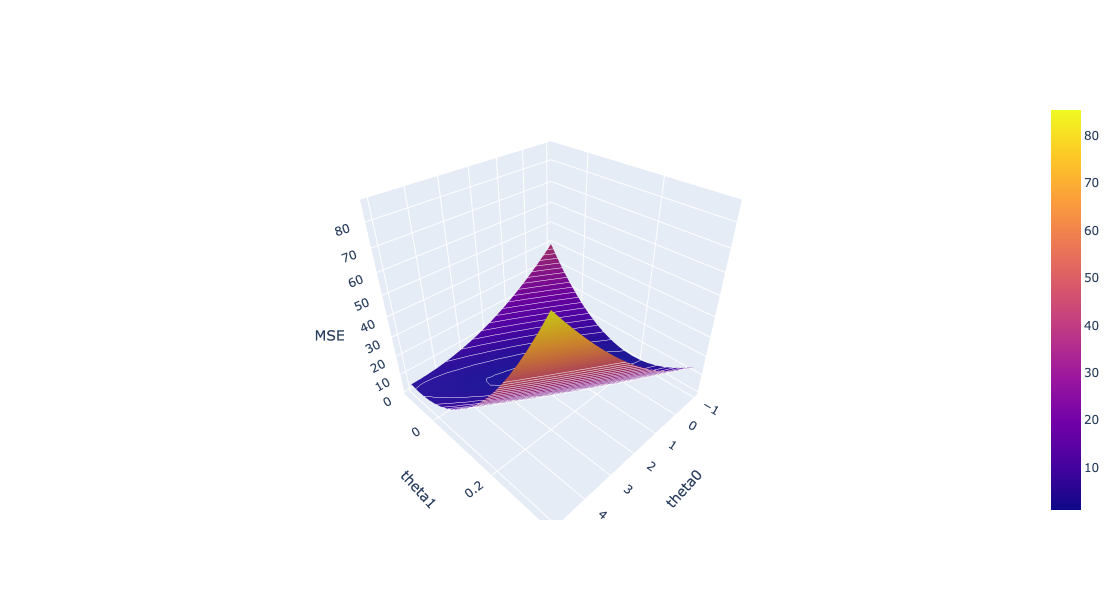

In [35]:
import plotly.graph_objects as go

uvalues = np.linspace(-1, 5, 20)
vvalues = np.linspace(-0.1, 0.35, 20)
(u,v) = np.meshgrid(uvalues, vvalues)
thetas = np.vstack((u.flatten(),v.flatten()))


MSE = np.array([mse_loss(t) for t in thetas.T])

loss_surface = go.Surface(x=u, 
    y=v, z=np.reshape(MSE, u.shape),
    contours = {"z": {"show": True, "start": 0, "end": 50, "size": 2, "color": "white"}})

ind = np.argmin(MSE)
optimal_point = go.Scatter3d(name = "Optimal Point",
    x = [thetas.T[ind,0]], y = [thetas.T[ind,1]], 
    z = [MSE[ind]],
    marker=dict(size=10, color="red"))

fig = go.Figure(data=[loss_surface, optimal_point])
fig.update_layout(scene = dict(
    xaxis_title = "theta0",
    yaxis_title = "theta1",
    zaxis_title = "MSE"), autosize=False, width=800, height=600)

fig.show()

Play around with the plot above. We have marked the lowest point on the surface in red – this is the combination of $\theta_0$ and $\theta_1$ that leads to the lowest MSE for the model.

Alternatively, we can visualize a bird's-eye view of the loss surface from above using a contour plot: 

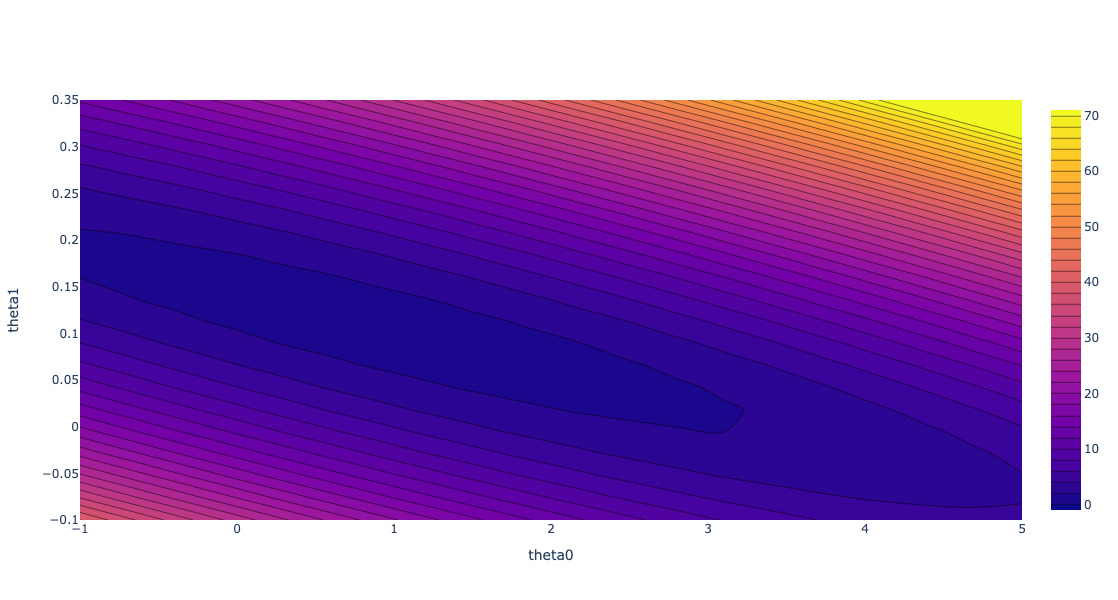

In [36]:
contour = go.Contour(x=u[0], y=v[:, 0], z=np.reshape(MSE, u.shape), 
                     contours=dict(start=0, end=70,size=2))
fig = go.Figure(contour)
fig.update_layout(
    xaxis_title = "theta0",
    yaxis_title = "theta1", autosize=False, width=800, height=600)

fig.show()

#### Applying Gradient Descent in 2D

When working with multidimensional models, we optimize a *vector* of parameters. Our new update rule is:

$$\vec{\theta}^{(t+1)} = \vec{\theta}^{(t)} - \alpha \nabla_{\vec{\theta}} L(\vec{\theta}^{(t)})$$

Where $\nabla_{\vec{\theta}} L(\vec{\theta}^{(t)})$ is the **gradient** of the loss function. It is the vector of the partial derivatives of loss with respect to each parameter $\theta_i$.

In the cell below, we define helper functions to compute the gradient of MSE with respect to our two parameters $\theta_0$ and $\theta_1$, stored in the array `theta`.

In [37]:
def mse_gradient(theta):
    """Returns the gradient of the MSE on our data for the given theta"""
    x0 = X.iloc[:, 0]
    x1 = X.iloc[:, 1]
    dth0 = np.mean(-2 * (y - theta[0]*x0 - theta[1]*x1) * x0)
    dth1 = np.mean(-2 * (y - theta[0]*x0 - theta[1]*x1) * x1)
    return np.array([dth0, dth1])

Now, we can use our `gradient_descent` function from before to optimize $\theta_0$ and $\theta_1$ at the same time! The final estimates for the ideal model parameters are very similar to the guesses we may have made simply by inspecting the plot of the loss surface from before. 

The cell below may take a moment to run.

In [38]:
guesses = gradient_descent(mse_gradient, np.array([1, .5]), 0.001, 10000)

pd.DataFrame(guesses, columns=["theta_0", "theta_1"]).tail(10)

theta_0   theta_1
9990  0.922487  0.104931
9991  0.922486  0.104931
9992  0.922485  0.104931
9993  0.922484  0.104931
9994  0.922484  0.104931
9995  0.922483  0.104931
9996  0.922482  0.104931
9997  0.922481  0.104931
9998  0.922481  0.104931
9999  0.922480  0.104932

Comparing with the scipy minimize function.

In [39]:
minimize(mse_loss, x0 = [0,0])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0360194420114932
        x: [ 9.203e-01  1.050e-01]
      nit: 3
      jac: [-4.470e-08 -2.980e-08]
 hess_inv: [[ 2.980e+00 -1.253e-01]
            [-1.253e-01  6.335e-03]]
     nfev: 15
     njev: 5

We can actually provide the gradient information to the scipy optimizer to get an even faster solution.

In [40]:
minimize(mse_loss, x0 = [0,0],jac=mse_gradient)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 1.0360194420113769
        x: [ 9.203e-01  1.050e-01]
      nit: 3
      jac: [-1.238e-15 -2.353e-14]
 hess_inv: [[ 2.980e+00 -1.253e-01]
            [-1.253e-01  6.335e-03]]
     nfev: 5
     njev: 5

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Stochastic Gradient Descent on Multi-Dimensional Models

Next lecture...

In [41]:
def mse_gradient(theta, X, y):
    """Returns the gradient of the MSE on our data for the given theta"""
    x0 = X.iloc[:, 0]
    x1 = X.iloc[:, 1]
    dth0 = np.mean(-2 * (y - theta[0]*x0 - theta[1]*x1) * x0)
    dth1 = np.mean(-2 * (y - theta[0]*x0 - theta[1]*x1) * x1)
    return np.array([dth0, dth1])

In [42]:
def sgd(grad, X, y, initial_theta, eta = 0.3, max_iter = 5000, batch_size=50 ):
    theta = initial_theta
    thetas = [theta]
    n = len(X)
    for t in range(1, max_iter):
        X_sample = X.sample(batch_size)
        y_sample = y.loc[X_sample.index]
        theta = theta - eta/t * grad(theta, X_sample, y_sample)
        thetas.append(theta)
    return thetas


In [43]:
thetas = sgd(mse_gradient, X, y, 
             initial_theta = np.array([1, .5]), 
             eta = 0.001, 
             max_iter = 10000,
             batch_size=1)
thetas[-5:]

[array([1.00734371, 0.10162758]),
 array([1.00734392, 0.101631  ]),
 array([1.00734399, 0.10163254]),
 array([1.00734412, 0.1016371 ]),
 array([1.00734426, 0.1016396 ])]